In [7]:
!pip install matplotlib

本頁完成
本頁完成
本頁完成
['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '為', '為了', '為什麼', '為何', '為止', '為此', '為著', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以為', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何', '任憑', '似的', '但', '但凡', '但是', '何', '何以', '何況', '何處', '何時', '余外', '作為', '你', '你們', '使', '使得', '例如', '依', '依據', '依照', '便於', '俺', '俺們', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '儻然', '像', '兒', '先不先', '光是'

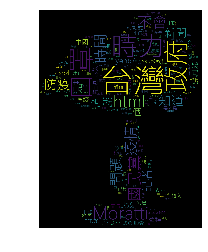

In [14]:
import requests
import bs4

url='https://www.ptt.cc/bbs/HatePolitics/index4009.html'

apost=[]
for round in range(3):
    r = requests.get(url, cookies={'over18': '1'})
    reson = r.text
    soup = bs4.BeautifulSoup(reson, 'html.parser')
    titles = soup.find_all('div', class_='r-ent')
    for title in titles:
        try:
            t = title.find('div',class_='title')
            th=title.find('a')['href']
            # print(t.text)
            # print('https://www.ptt.cc{x}'.format(x=th))
            post_url='https://www.ptt.cc{x}'.format(x=th)
            x=requests.get(post_url , cookies={'over18':'1'})
            xeson=x.text
            xoup=bs4.BeautifulSoup(xeson,'html.parser')
            post=xoup.find('div',class_='bbs-screen bbs-content')
            # print(post.text)
            apost.append(post.text)
        except:
            pass
    print('本頁完成')
    up=soup.select('div.btn-group-paging a')[1]['href']
    new_url='https://www.ptt.cc{e}'.format(e=up)
    url=new_url

str1=''.join(apost)

with open('python38.txt','w',encoding='utf-8') as file:
    file.write(str1)

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(font_path='C:\Windows\Fonts\msjhbd.ttc')

with open('python38.txt' , 'r' , encoding='utf-8') as rd:
    date =rd.read()

with open('stopword', 'r',encoding='utf-8') as st:
    stop_word=st.read().split('\n')
print(stop_word)
# print(date)

seg_list =jieba.cut(date,cut_all=False)

wl_space_split= "+".join(seg_list)
# print(wl_space_split)
wlists=wl_space_split.split("+")
# print(wlists)
#----停用詞轉換-----
final_word=[]



for wlist in wlists:
    x = 0
    for stop in stop_word:
        if wlist  not in stop :
          x = x+1
        if x == 852:
            final_word.append(wlist)
            final_word.append(' ')
            # print(x)
        else:
            continue

ffword=''.join(final_word)
print(ffword)
#到這
# print(wl_space_split)
import numpy as np #製作遮罩面
import PIL.Image as image
back_pic=np.array(image.open('pngguru.jpg'))
wc = WordCloud(background_color='black',font_path="C:\WINDOWS\FONTS\MSJHL.TTC",mask=back_pic)
my_wordcloud = wc.generate(ffword)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
